<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/IMT_Exemplo_ARIMA_1_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **$ARIMA(p,d,q)$**



# **CASE:** Vendas diárias e projeção mensal

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from statsmodels.datasets import co2
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


# **Exercício 1**

In [ ]:
#@markdown Just run
path = 'https://github.com/Rogerio-mack/IMT_CD_2025/raw/refs/heads/main/data/'

df = pd.read_csv(path + 'vendas_319326781.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df = df.dropna()
df.columns = ['ts']


# **CASE**: Vendas diárias e mensais

Dada a série de vendas diárias abaixo faça um modelo $ARIMA(p,d,q)$ para previsão da média de vendas no mês.

1. Determine os parâmetros do modelo $ARIMA(p,d,q)$
2. Determine o erro de predição das vendas de 2025
3. Verifique o melhor modelo $ARIMA(p,d,q)$ pelo critério AIC e erro RMSE


,ts
2020-01-12,1120.785445
2020-01-13,1122.262253
2020-01-14,1187.110445
2020-01-15,1148.020042
2020-01-16,1082.888180


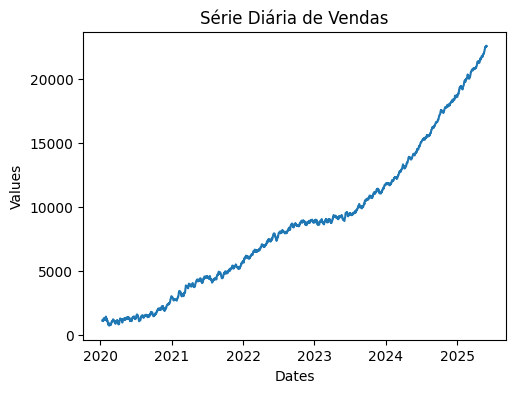

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(df)
plt.title('Série Diária de Vendas')
plt.xlabel('Dates')
plt.ylabel('Values')

df.head()

# 1. (\*) Data, Pré-Processamento

# 2. Exploração da Série, Decomposição

# 3. (\*) Teste de estacionariedade (Dickey-Fuller Aumentado - ADF), **$d$**

Uma série estacionária, é uma série em que as estatísticas dos dados, isto é, média, variância e covariância não mudam ao longo do tempo.

> Dickey-Fuller Aumentado - ADF, $H_0 =$ *Série não é estacionária*

# 4. (\*) Auto-correlação e Correlação Parcial, ACF e PACF, **$q, p$**

* PACF (Partial Autocorrelation Function) → usado para escolher $p$ (parte autoregressiva AR)

* ACF (Autocorrelation Function) → usado para escolher $q$ (parte média móvel MA)

# 5. (\*) Forecast,

$$ARIMA(p, d, q)(0,0,0,0)$$



# 6. Análise dos Resíduos

## Testes de normalidade do erro

## Correlação dos resíduos

# 7. (\*) Análise do Erro

# 8. (\*) Seleção de Modelos para vários parâmetros

# **Exercício 2**

Aplique o teste de significância adequado que demonstra se há diferença significativa entre as médias anuais e as séries de diferenças ($d=0,1,2$), exibindo um tabela como abaixo.

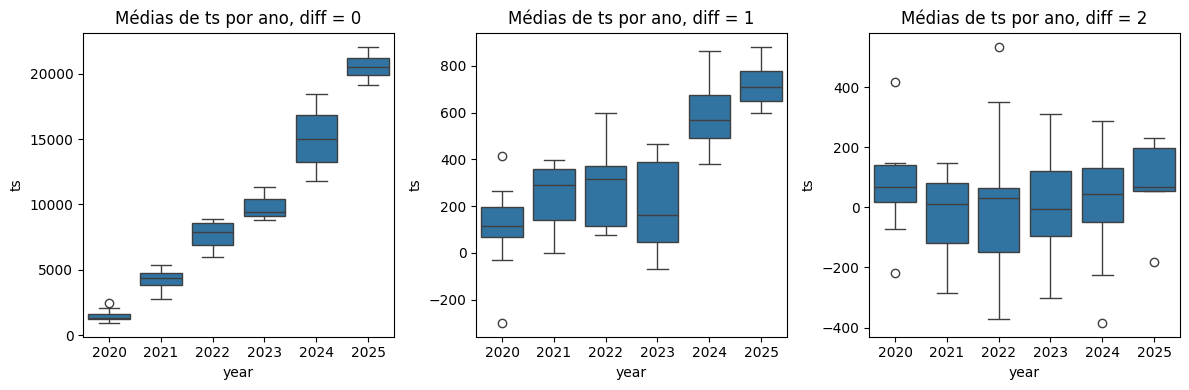

In [ ]:
#@markdown Just run
fig, ax = plt.subplots(1,3,figsize=(12, 4))

for label, ts_ in zip(np.arange(3),[ts, ts.diff().dropna(), ts.diff().diff().dropna(),]):

  ts_with_year = ts_.copy() # .to_frame(name='ts') # .diff().diff().dropna().to_frame(name='ts')
  ts_with_year['year'] = ts_with_year.index.year

  sns.boxplot(x='year', y='ts', data=ts_with_year,ax=ax[label])
  ax[label].set_title(f'Médias de ts por ano, diff = {label}')

plt.tight_layout()
plt.show()


Fake results...


,ts Diff,f_statistic,p_value,Rejeita H0
0,d=0,266.4655,0.0100,True
1,d=1,18.5178,0.0600,False
2,d=2,0.4088,0.2016,False
